<a href="https://colab.research.google.com/github/avery-wang/Week1_Public/blob/master/ChallengeProject/ChallengeProject_Complete_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 1 Challenge Project
This is the complete notebook, which includes both the data cleaning and visualization section released on Day 2, and additional guidelines for model creation and evaluation. If you were already working on the notebook from before, you may have to copy your work over.

At the end of this notebook, there is also a description of how to finalize and present your project.

## Challenge Introduction

> Original author: Lyle Lalunio

Hypothyroidism, also called underactive thyroid or low thyroid, is a disorder of the endocrine system in which the thyroid gland does not produce enough thyroid hormone. It can cause a number of symptoms, such as poor ability to tolerate cold, a feeling of tiredness, constipation, depression, and weight gain. Occasionally there may be swelling of the front part of the neck due to goitre. Untreated hypothyroidism during pregnancy can lead to delays in growth and intellectual development in the baby or cretinism.

Worldwide, too little iodine in the diet is the most common cause of hypothyroidism. In countries with enough iodine in the diet, the most common cause of hypothyroidism is the autoimmune condition Hashimoto's thyroiditis. Less common causes include: previous treatment with radioactive iodine, injury to the hypothalamus or the anterior pituitary gland, certain medications, a lack of a functioning thyroid at birth, or previous thyroid surgery. The diagnosis of hypothyroidism, when suspected, can be confirmed with blood tests measuring thyroid-stimulating hormone (TSH) and thyroxine levels.

Worldwide about one billion people are estimated to be iodine deficient; however, it is unknown how often this results in hypothyroidism. In the United States, hypothyroidism occurs in 0.3–0.4% of people.

And that is why we iodize salt.

![alt text](https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2013/11/15/17/39/ds00181_-ds00344_-ds00353_-ds00491_-ds00492_-ds00567_-ds00660_-my00709_im01872_thyroid_gif.jpg)



Background: Doctors all around the world need our help to predict whether a patient has hypothyroid disease. We have already overspent our budget to collect such complete data on about 30 attributes for 2800 patients--a good starting number, but a larger sample would certainly be preferred. Moving forward, however, we simply cannot afford to spend so much money on data collection. Therefore, we also need to determine which attributes are the most meaningful to the predictive models, and cut out the rest that don't contribute much. 

The boss wants to see a **balanced** model that can predict with a **high sensitivity** and **high specificity** while using a ***low amount of features***. Collecting complete data such as this is very rare, very time-consuming, and often very expensive. By minimizing the number of features, it will optimize future data collection by deciding what needs to be collected, and what doesn't.

## Loading the data

Let's read the data into a Pandas dataframe and look at the first 20 records.

In [57]:
import pandas as pd

url = "https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/ChallengeProjects/Week1/allhypo.train.data.csv"
dataset=pd.read_csv(url) 
dataset.head(20)

,Age,Sex,On thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4u,FTI measured,FTI,TBG measured,TBG,referral source,class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative.|2807
5,18,F,t,f,f,f,f,f,f,f,f,f,f,f,f,t,0.03,f,?,t,183,t,1.3,t,141,f,?,other,negative.|3434
6,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,t,72,t,0.92,t,78,f,?,other,negative.|1595
7,80,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.2,t,0.6,t,80,t,0.7,t,115,f,?,SVI,negative.|1367
8,66,F,f,f,f,f,f,f,f,f,f,f,f,t,f,t,0.6,t,2.2,t,123,t,0.93,t,132,f,?,SVI,negative.|1787
9,68,M,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.4,t,1.6,t,83,t,0.89,t,93,f,?,SVI,negative.|2534


Great, looks like the data loaded in properly. Let's continue looking at some summary statistics on our data.

## Viewing summary statistics
The functions describe() and info() are your friends

In [58]:
dataset.describe()

,Age,Sex,On thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4u,FTI measured,FTI,TBG measured,TBG,referral source,class
count,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800
unique,94,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,264,2,65,2,218,2,139,2,210,1,1,5,2800
top,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,?,t,?,t,?,t,?,t,?,f,?,other,negative.|3709
freq,75,1830,2470,2760,2766,2690,2759,2761,2752,2637,2627,2786,2775,2729,2665,2516,284,2215,585,2616,184,2503,297,2505,295,2800,2800,1632,1


In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        2800 non-null   object
 1   Sex                        2800 non-null   object
 2   On thyroxine               2800 non-null   object
 3   query on thyroxine         2800 non-null   object
 4   on antithyroid medication  2800 non-null   object
 5   sick                       2800 non-null   object
 6   pregnant                   2800 non-null   object
 7   thyroid surgery            2800 non-null   object
 8   I131 treatment             2800 non-null   object
 9   query hypothyroid          2800 non-null   object
 10  query hyperthyroid         2800 non-null   object
 11  lithium                    2800 non-null   object
 12  goitre                     2800 non-null   object
 13  tumor                      2800 non-null   object
 14  psych   

Note the data types are all objects--even columns that are obviously numeric like Age.


## Data cleaning

To start, let's make all the numerical columns contain the correct type of values and change the data type of those columns to numeric. Let's also replace all those question marks with the median of the respective column.

Hint: To make it easier, first try converting all the "?" to NaN.

In [60]:
import numpy as np
dataset = dataset.replace("?", np.nan)
dataset = dataset.replace("M", 0)
dataset = dataset.replace("F", 1)

# The categories which have numerical responses:
numbers = ["TSH", "T3", "TT4", "T4u", "FTI", "TBG"]

# Replace NaN with median:
for i in numbers:
  dataset[i].fillna(dataset[i].median(), inplace=True)
dataset.head(20)

,Age,Sex,On thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4u,FTI measured,FTI,TBG measured,TBG,referral source,class
0,41,1.0,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,NaN,SVHC,negative.|3733
1,23,1.0,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,0.98,f,107,f,NaN,other,negative.|1442
2,46,0.0,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,2,t,109,t,0.91,t,120,f,NaN,other,negative.|2965
3,70,1.0,t,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,0.98,f,107,f,NaN,other,negative.|806
4,70,1.0,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,NaN,SVI,negative.|2807
5,18,1.0,t,f,f,f,f,f,f,f,f,f,f,f,f,t,0.03,f,2,t,183,t,1.3,t,141,f,NaN,other,negative.|3434
6,59,1.0,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.4,f,2,t,72,t,0.92,t,78,f,NaN,other,negative.|1595
7,80,1.0,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.2,t,0.6,t,80,t,0.7,t,115,f,NaN,SVI,negative.|1367
8,66,1.0,f,f,f,f,f,f,f,f,f,f,f,t,f,t,0.6,t,2.2,t,123,t,0.93,t,132,f,NaN,SVI,negative.|1787
9,68,0.0,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.4,t,1.6,t,83,t,0.89,t,93,f,NaN,SVI,negative.|2534


Hmm, still looks like the TBG column is unfilled, implying it was empty to begin with. Let's get rid of this column, then (and make sure to get rid of it in your list of numeric columns, too!)

In [61]:
numbers = numbers[:-1]
del dataset["TBG"]
dataset.head(20)

,Age,Sex,On thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4u,FTI measured,FTI,TBG measured,referral source,class
0,41,1.0,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,SVHC,negative.|3733
1,23,1.0,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,0.98,f,107,f,other,negative.|1442
2,46,0.0,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,2,t,109,t,0.91,t,120,f,other,negative.|2965
3,70,1.0,t,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,0.98,f,107,f,other,negative.|806
4,70,1.0,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,SVI,negative.|2807
5,18,1.0,t,f,f,f,f,f,f,f,f,f,f,f,f,t,0.03,f,2,t,183,t,1.3,t,141,f,other,negative.|3434
6,59,1.0,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.4,f,2,t,72,t,0.92,t,78,f,other,negative.|1595
7,80,1.0,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.2,t,0.6,t,80,t,0.7,t,115,f,SVI,negative.|1367
8,66,1.0,f,f,f,f,f,f,f,f,f,f,f,t,f,t,0.6,t,2.2,t,123,t,0.93,t,132,f,SVI,negative.|1787
9,68,0.0,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.4,t,1.6,t,83,t,0.89,t,93,f,SVI,negative.|2534


All right, let's take a look now at the info of *just the numeric columns* in the dataset:

In [62]:
nums = dataset[numbers].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TSH     2800 non-null   object
 1   T3      2800 non-null   object
 2   TT4     2800 non-null   object
 3   T4u     2800 non-null   object
 4   FTI     2800 non-null   object
dtypes: object(5)
memory usage: 109.5+ KB


Perfect, now let's fix that class feature. According to the note the data collectors included with this data, the ".|####" refers to a patient number, and is not necessarily relevant for our purposes here.

In [63]:
for i in range(dataset['class'].shape[0]):
  dataset['class'][i]=dataset['class'][i].split(".")[0]
dataset['class'].head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0                    negative
1                    negative
2                    negative
3                    negative
4                    negative
5                    negative
6                    negative
7                    negative
8                    negative
9                    negative
10                   negative
11                   negative
12                   negative
13                   negative
14                   negative
15    compensated hypothyroid
16                   negative
17                   negative
18                   negative
19                   negative
Name: class, dtype: object

Let's run the describe() function on just the "class" column.

In [64]:
dataset['class'].describe()

count         2800
unique           4
top       negative
freq          2580
Name: class, dtype: object

It looks like there are actually 4 unique classification variables! Thank goodness we didn't assume it was binary.

Display all the unique values in the class column.

In [65]:
dataset['class'].unique()

array(['negative', 'compensated hypothyroid', 'primary hypothyroid',
       'secondary hypothyroid'], dtype=object)

But let's make it binary for the sake of this example anyway. If you finish early later on, try the multiclass classifier with all 4 values!

In [66]:
#everything except 'negative' is replaced by the number zero. everything else gets number 1
dataset['class'] = dataset['class'].replace("negative", 0)
dataset['class'] = dataset['class'].replace(['compensated hypothyroid', 'primary hypothyroid',  'secondary hypothyroid'], 1)
dataset['class'].head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    1
16    0
17    0
18    0
19    0
Name: class, dtype: int64

Before we move on, let's not forget to run the describe() function on just  your categorical columns, too.
Compare it to the describe() that your numeric columns produce.

In [67]:
words = dataset.copy().drop(["TSH","T3", "TT4", "T4u", "FTI"], axis = 1)
words.describe()

,Sex,class
count,2690.000000,2800.000000
mean,0.680297,0.078571
std,0.466448,0.269117
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


Great! Let's see if there's any other records we have to address. count() is a nice way to check if we have any other missing values.

In [68]:
dataset.count()

Age                          2799
Sex                          2690
On thyroxine                 2800
query on thyroxine           2800
on antithyroid medication    2800
sick                         2800
pregnant                     2800
thyroid surgery              2800
I131 treatment               2800
query hypothyroid            2800
query hyperthyroid           2800
lithium                      2800
goitre                       2800
tumor                        2800
psych                        2800
TSH measured                 2800
TSH                          2800
T3 measured                  2800
T3                           2800
TT4 measured                 2800
TT4                          2800
T4U measured                 2800
T4u                          2800
FTI measured                 2800
FTI                          2800
TBG measured                 2800
referral source              2800
class                        2800
dtype: int64

We could replace the missing values in proportion to the current number of males and females over the total, but that is making an assumption we don't have to make. For now, let's simply cut the records of all these sexless people out of our data.

In [69]:
dataset = dataset.dropna(subset=['Sex', 'Age'])
dataset.count()

Age                          2689
Sex                          2689
On thyroxine                 2689
query on thyroxine           2689
on antithyroid medication    2689
sick                         2689
pregnant                     2689
thyroid surgery              2689
I131 treatment               2689
query hypothyroid            2689
query hyperthyroid           2689
lithium                      2689
goitre                       2689
tumor                        2689
psych                        2689
TSH measured                 2689
TSH                          2689
T3 measured                  2689
T3                           2689
TT4 measured                 2689
TT4                          2689
T4U measured                 2689
T4u                          2689
FTI measured                 2689
FTI                          2689
TBG measured                 2689
referral source              2689
class                        2689
dtype: int64

Nice! Now we have a pretty clean dataset to work with. Let's now do some further data analysis and visualization to better understand what we're working with.

## Data analysis and visualization

Check the correlation

In [70]:
dataset.corr()

,Sex,class
Sex,1.000000,0.042942
class,0.042942,1.000000


Convert the class feature to numeric so we can also see the correlations it has with the numeric features, and check the correlation again.

In [71]:
# Convert things to numbers
for i in numbers:
  dataset[i] = dataset[i].astype(float)

dataset.corr()

,Sex,TSH,T3,TT4,T4u,FTI,class
Sex,1.000000,0.033820,0.063014,0.160796,0.228045,0.029370,0.042942
TSH,0.033820,1.000000,-0.155747,-0.259654,0.066161,-0.295180,0.441607
T3,0.063014,-0.155747,1.000000,0.514649,0.423896,0.312481,-0.167819
TT4,0.160796,-0.259654,0.514649,1.000000,0.432103,0.781902,-0.268960
T4u,0.228045,0.066161,0.423896,0.432103,1.000000,-0.166805,0.031782
FTI,0.029370,-0.295180,0.312481,0.781902,-0.166805,1.000000,-0.292697
class,0.042942,0.441607,-0.167819,-0.268960,0.031782,-0.292697,1.000000


Let's do some further visual analysis using a new module called seaborn. Explore its incredible versatility and diversity with data visualization here: https://seaborn.pydata.org/

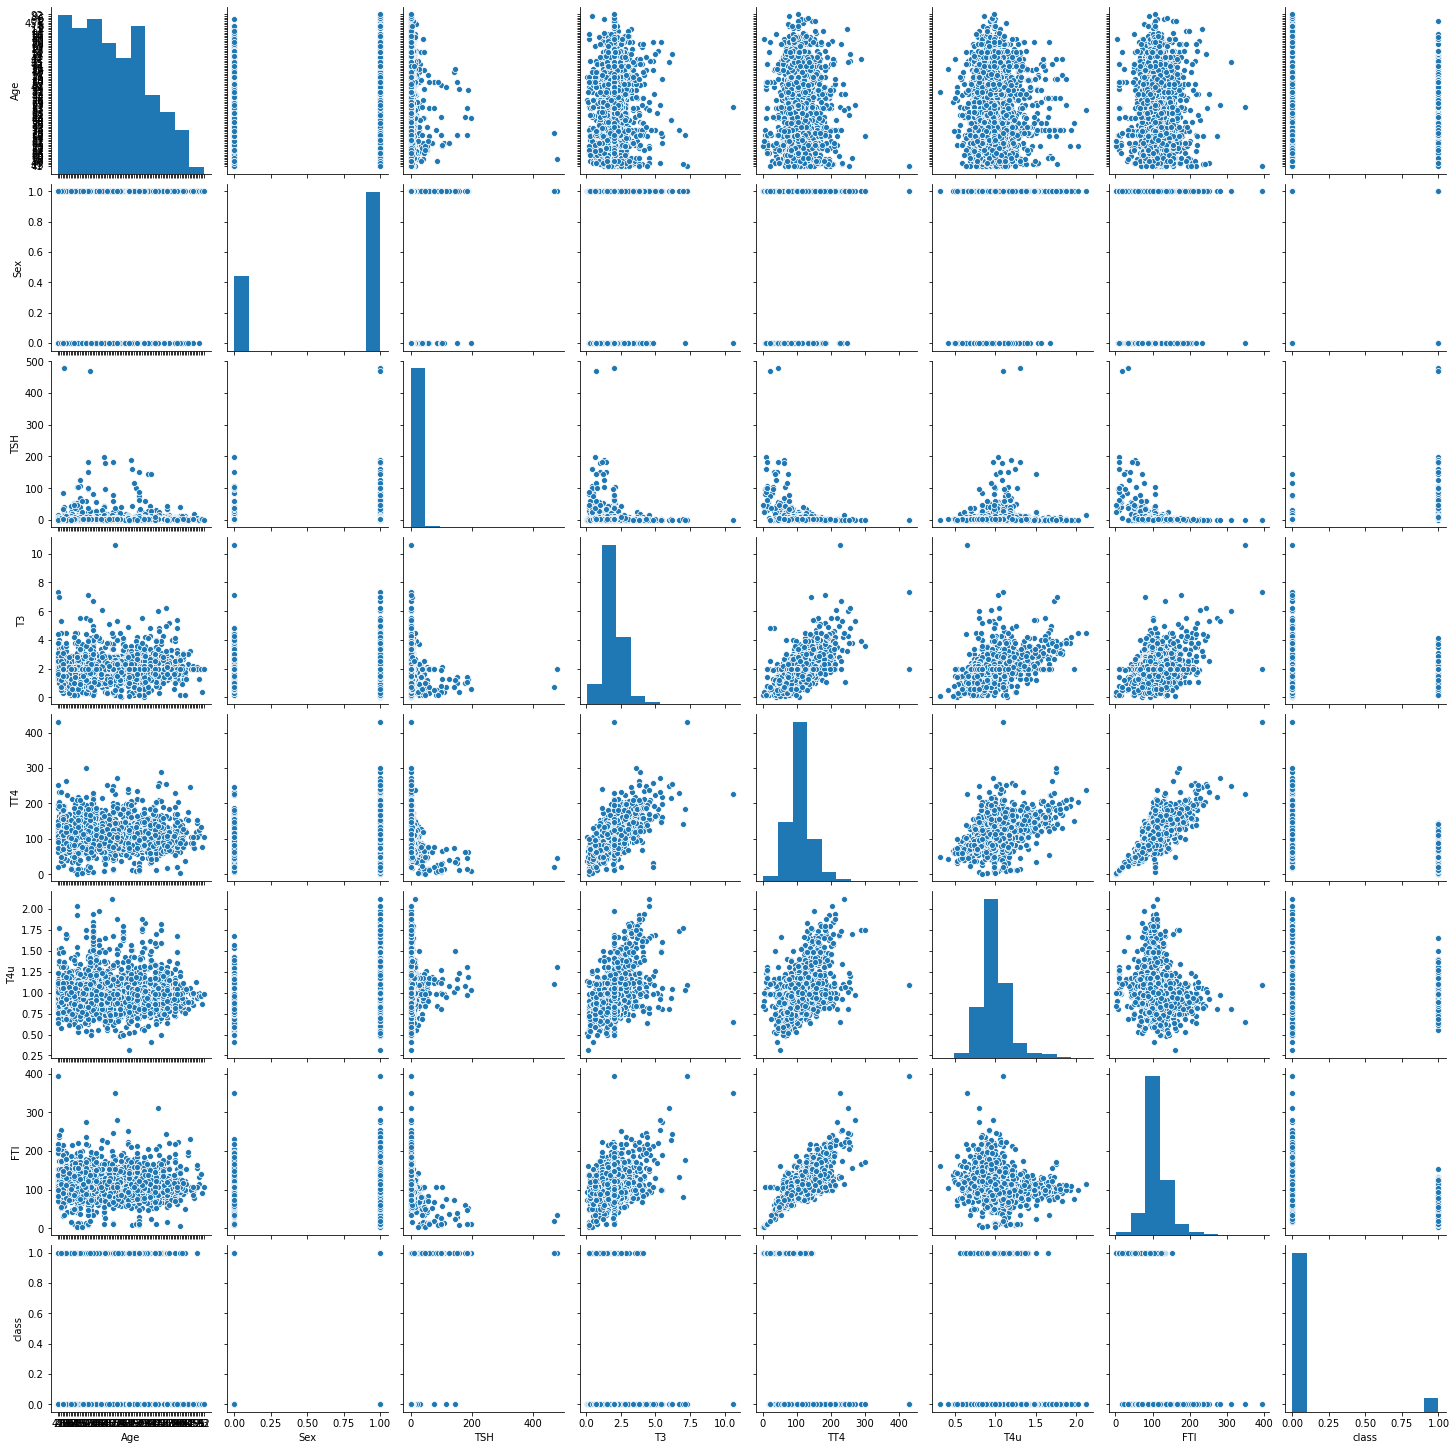

In [72]:
import seaborn as sns
sns.pairplot(dataset)

OK! I think we're ready to create and select some supervised learning models. To get the ball rolling, select Age and Sex as our explanatory features (and class as the target feature, obviously).

In [73]:
explanatory = ['Age', 'Sex']
target = ['class']

## Model training and selection

Let's use get_dummies on the categorical variables (but not the class value!) to view the column names to select some for our model.

In [74]:
pd.get_dummies(data=dataset, columns=["Sex"])

,Age,On thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4u,FTI measured,FTI,TBG measured,referral source,class,Sex_0.0,Sex_1.0
0,41,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.30,t,2.5,t,125.0,t,1.14,t,109.0,f,SVHC,0,0,1
1,23,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.10,t,2.0,t,102.0,f,0.98,f,107.0,f,other,0,0,1
2,46,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,2.0,t,109.0,t,0.91,t,120.0,f,other,0,1,0
3,70,t,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175.0,f,0.98,f,107.0,f,other,0,0,1
4,70,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61.0,t,0.87,t,70.0,f,SVI,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.70,f,2.0,t,155.0,t,1.05,t,148.0,f,SVI,0,1,0
2796,73,f,t,f,f,f,f,f,f,f,f,f,f,f,f,1.40,t,0.7,t,63.0,t,0.88,t,72.0,f,other,0,1,0
2797,75,f,f,f,f,f,f,f,f,t,f,f,f,f,f,1.40,f,2.0,t,147.0,t,0.80,t,183.0,f,other,0,1,0
2798,60,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.40,f,2.0,t,100.0,t,0.83,t,121.0,f,other,0,0,1


All right, let's now split our data into training and testing in an 80-20 split. For consistency, let's all use a seed of 8675309.

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(dataset[explanatory], dataset['class'], test_size=0.2, random_state=8675309)

For reusability, let's make a logistic regression function that will take our training and testing data as arguments. Inside the function, build a model on your training data, fit it with your training class data, and return a list of your predictions.

In [76]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

def log_reg(train_X,train_Y,test_X,test_Y):
  logreg = LogisticRegression()
  logreg.fit(train_X, train_Y)
  return logreg.predict(test_X)

Fantastic, we have just built a logistic regression model! Let's go see how well it performs.

### Model evaluation

To start, let's establish the baseline performance. This is important because it provides a starting point of comparison for later evaluation methods, like accuracy.

A good baseline model to use is the Zero Rule algorithm. In classification problems, it simply predicts the class value with the greatest number of instances every time.

In [77]:
def zero_rule_algorithm_classification(train,test):
  mode = train.mode()
  return [mode for i in test]

Get your baseline performance by calculating the accuracy of your Zero Rule algorithm.

In [78]:
from sklearn.metrics import accuracy_score

y_train_pred=zero_rule_algorithm_classification(y_train, y_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=zero_rule_algorithm_classification(y_train, y_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  91.91073919107392
Validation Accuracy is  93.12267657992564


So maybe accuracy isn't the best performance measure for this dataset. As you've seen already, even when the models predict "negative" for all the records, we could already achieve a ~92% accuracy. However, that also implies we incorrectly predicted 100% of the positive cases, which in the context of this problem, is fatal.

Thankfully, it isn't the only way to evaluate your model. Let's start by creating a confusion matrix using the logistic regression function you built earlier.

In [79]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

labels = [0,1]
cm = metrics.confusion_matrix(y_val, log_reg(X_train, y_train, X_val, y_val), labels)
print(cm)

[[501   0]
 [ 37   0]]


Hopefully you remember our discussion of the Area Under the Receiver Operator Curve metric. This can measure the accuracy of a test to discriminate diseased cases from normal cases.

When you consider the results of a particular test in two populations, one population with a disease, the other population without the disease, you will rarely observe a perfect separation between the two groups. Hence, the overlapping areas in the diagram below (FN, FP).

To review, on a Receiver Operating Characteristic (ROC) curve, the true positive rate is plotted in function of the false positive rate for different cut-off points. Each point on the ROC curve represents a sensitivity/specificity pair corresponding to a particular decision threshold. A test with perfect discrimination (no overlap in the two distributions) has a ROC curve that passes through the upper left corner. Therefore the closer the ROC curve is to the upper left corner, the higher the overall accuracy of the test.

![alt text](https://www.medcalc.org/manual/_help/images/roc_intro1.png)





Now, to graph the AUROC curve, we will need to predict probabilities of choosing a specific class value rather than the class value itself. Make a new logistic regression model that does so.

In [80]:
from sklearn.linear_model import LogisticRegression

### Your code here

Now calculate the area under the receiver operator curve with your predictions.

In [81]:
from sklearn import metrics

### Your code here

Now graph the ROC curve using matplotlib, fully labeled.

In [82]:
import matplotlib.pyplot as plt
### Your code here

In conclusion, it looks like this model performed pretty bad. It's probably best to try out different columns or perhaps use a different model before we submit our model for scoring. Get creative!

In [83]:
# Use a KNN Model:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Convert t and f into 1 and 0
dataset = dataset.replace("t", 1)
dataset = dataset.replace("f", 0)
dataset["Age"] = dataset["Age"].astype(float)
del dataset["TBG measured"]

# Standardize the numerical data
norm_data = dataset
for i in numbers:
    feature_data = norm_data[i].values.reshape(-1, 1)
    scaler.fit(feature_data)
    norm_data[i] = scaler.transform(feature_data)

cols = list(norm_data.columns)[:-2] # Remove "referral source" and "class"
print(cols)

['Age', 'Sex', 'On thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4u', 'FTI measured', 'FTI']


In [84]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import time
import random
from itertools import combinations
from sklearn.neighbors import KNeighborsClassifier
from statistics import mean

combos = [["On thyroxine", "TSH"], ["On thyroxine", "TSH", "thyroid surgery"], ["On thyroxine", "TSH", "query hyperthyroid"]]

av = []
bv = []
cv = []
a_roc = []
b_roc = []
c_roc = []

for params in combos:
  for i in random.sample(range(0, 99999999), 100):
    # 80-20 train-test split of dataset
    X_cols = list(params)
    test_size = 0.2
    X_train, X_test, y_train, y_test = train_test_split(norm_data[X_cols], norm_data['class'], test_size=test_size, random_state=i)
    
    # creating model with sklearn's KNeighborsClassifier -- after running these cells play around with the parameter n!
    knn = KNeighborsClassifier(n_neighbors=3)
    # training/fitting a model with training data
    knn.fit(X_train, y_train)

    predictions_fast = knn.predict(X_test)

    test_score = accuracy_score(y_test,predictions_fast)
    roc = roc_auc_score(y_test, predictions_fast)

    if params == ["On thyroxine", "TSH"]:
      av.append(test_score)
      a_roc.append(roc)
    if params == ["On thyroxine", "TSH", "thyroid surgery"]:
      bv.append(test_score)
      b_roc.append(roc)
    if params == ["On thyroxine", "TSH", "query hyperthyroid"]:
      cv.append(test_score)
      c_roc.append(roc)
    
    if roc > 0.99 and test_score > 0.993:
      print("Combo: ", params, "ROC: ", roc, "Acc: ", test_score)

print("Parameters: ", combos[0], "Accuracy: ", mean(av))
print("Parameters: ", combos[1], "Accuracy: ", mean(bv))
print("Parameters: ", combos[2], "Accuracy: ", mean(cv))
print("Parameters: ", combos[0], "ROC: ", mean(a_roc))
print("Parameters: ", combos[1], "ROC: ", mean(b_roc))
print("Parameters: ", combos[2], "ROC: ", mean(c_roc))

Combo:  ['On thyroxine', 'TSH'] ROC:  0.9970178926441352 Acc:  0.9944237918215614
Combo:  ['On thyroxine', 'TSH'] ROC:  0.9969574036511156 Acc:  0.9944237918215614
Combo:  ['On thyroxine', 'TSH'] ROC:  0.991132647679325 Acc:  0.9962825278810409
Combo:  ['On thyroxine', 'TSH'] ROC:  0.997979797979798 Acc:  0.9962825278810409
Combo:  ['On thyroxine', 'TSH'] ROC:  0.9989878542510122 Acc:  0.9981412639405205
Combo:  ['On thyroxine', 'TSH'] ROC:  0.9969818913480885 Acc:  0.9944237918215614
Combo:  ['On thyroxine', 'TSH'] ROC:  0.9979633401221997 Acc:  0.9962825278810409
Combo:  ['On thyroxine', 'TSH'] ROC:  0.9970178926441352 Acc:  0.9944237918215614
Combo:  ['On thyroxine', 'TSH'] ROC:  0.9989858012170386 Acc:  0.9981412639405205
Combo:  ['On thyroxine', 'TSH'] ROC:  0.9969325153374233 Acc:  0.9944237918215614
Combo:  ['On thyroxine', 'TSH'] ROC:  0.9979879275653923 Acc:  0.9962825278810409
Combo:  ['On thyroxine', 'TSH'] ROC:  0.997983870967742 Acc:  0.9962825278810409
Combo:  ['On thyrox

## Submitting your Model

Once you believe to have found the best classifier, run your classifier on the test data and make a pickle file containing of your predictions contained a pandas dataframe.

This pandas dataframe will contain three columns for your binary classifier (or 5 columns for the multiclass classifier): the first column should be your model's "best guess" for each patient (either 0 or 1, negative or positive) and the last two columns should be the probability the patient would be classified as either a 0 or 1.

(see below for reference)

In [ ]:
#pickling example
import pickle
predictions=pd.DataFrame({"guesses":[0,1,0,1],"prob_neg":[.75,.15,.63,.20],"prob_pos":[.25,.85,.27,.80]})
prediction_pickle_path = 'prediction_pickle.pkl'

from google.colab import files
# Create an variable to pickle and open it in write mode
prediction_pickle = open(prediction_pickle_path, 'wb')
pickle.dump(predictions, prediction_pickle)
files.download(prediction_pickle_path)
prediction_pickle.close()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
prediction_unpickle = open(prediction_pickle_path, 'rb')
 
# load the unpickle object into a variable
predictions = pickle.load(prediction_unpickle)
 
print(predictions)

   guesses  prob_neg  prob_pos
0        0      0.75      0.25
1        1      0.15      0.85
2        0      0.63      0.27
3        1      0.20      0.80


We will compare your guesses with the true classifications to score your model using the AUC metric.

## Presenting your Model

Finally, we would like you to be able to present your model to the class. Prepare a notebook with the following things:

* **Features Chosen:** a list of the features used in your model, and an explanation of how you chose them.
* **Type of Model:** an explanation of the model type, parameters used, and why.
* **Evaluation:** at least one plot showing an evaluation of your model against a validation set. You can use a confusion matrix, AUROC, or another metric of your choice.

Feel free to include one or two additional plots that describe your process and/or model if you think that would be helpful.

## Moving to the Next Level

For those that finish early, remember how we converted the class values into the binary of "negative" and "positive"? Now try tackling the multiclass classifier (predicting the different types of positive hypothyroid cases instead of simply negative or positive)! 

The same rules apply!